### Pair Trading using RSI

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib as mpl

In [2]:
np.set_printoptions(precision = 3)

pd.set_option("precision", 3)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

In [3]:
def RSI(array, n):
    "RELATIVE STRENGTH INDEX"
    g = pd.Series(array).diff()
    l = g.copy()
    g[g < 0] = 0 
    l[l > 0] = 0
    RS = g.ewm(n, min_periods = n).mean() / l.abs().ewm(n, min_periods = n).mean()
    return 100 - 100 / (1 + RS)

In [4]:
#pairs
pairs = [('A', 'MTD'), ('ADP', 'PAYX'), ('FFIV', 'STX'), ('FFIV', 'ZBRA'), ('MPWR', 'TER'), ('ADI', 'TXN'), ('AMZN', 'CRM'), ('ADBE', 'ANSS'), ('AJG', 'BRO'), ('AJG', 'NDAQ'), ('ABT', 'LLY'), ('CRL', 'IDXX'), ('CRL', 'TECH'), ('AIZ', 'CB'), ('AIZ', 'CINF'), ('AIZ', 'WRB'), ('BK', 'PRU'), ('ANTM', 'DGX'), ('ANTM', 'LH'), ('CL', 'KMB'), ('AVB', 'EQR'), ('AVB', 'ESS'), ('EIX', 'PPL'), ('AEE', 'LNT')]

In [5]:
#rolling window for RSI estimation
n = 14

In [6]:
#High and low limits for signal construction
RSI_high = 70
RSI_low = 30

In [7]:
dataraw = pd.read_csv("equity_data_full", index_col = 1, parse_dates=True).iloc[:,[7,5]]
dataraw.columns = ["Ticker", "Close"]
dataraw.head()

,Ticker,Close
date,,
2010-01-04,A,20.234
2010-01-05,A,20.015
2010-01-06,A,19.944
2010-01-07,A,19.918
2010-01-08,A,19.911


In [8]:
data = pd.pivot_table(data = dataraw, values='Close', index=dataraw.index, columns='Ticker')
data.head()

Ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,20.234,19.486,38.659,29.149,NaN,22.174,8.740,17.689,33.421,37.090,...,13.978,19.794,43.664,32.728,NaN,18.843,55.248,28.670,11.435,NaN
2010-01-05,20.015,21.101,38.429,29.199,NaN,22.016,8.530,17.546,33.627,37.700,...,13.812,19.544,43.835,32.339,NaN,18.778,56.997,28.620,11.838,NaN
2010-01-06,19.944,20.470,38.764,28.735,NaN,21.807,8.400,17.643,33.985,37.620,...,13.838,19.411,44.214,32.552,NaN,18.644,56.979,28.400,12.867,NaN
2010-01-07,19.918,20.824,38.755,28.682,NaN,21.458,8.400,17.789,33.953,36.890,...,13.779,19.216,44.075,32.978,NaN,18.639,58.286,27.690,14.308,NaN
2010-01-08,19.911,20.470,38.908,28.873,NaN,21.691,8.230,17.880,33.818,36.690,...,13.785,19.497,43.898,32.978,NaN,18.644,57.061,27.600,14.077,NaN


In [9]:
data_return = data.apply(lambda x: np.log(x/x.shift(1)))
data_return.head()

Ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.011,0.080,-0.006,0.002,NaN,-0.007,-0.024,-0.008,0.006,0.016,...,-0.012,-0.013,0.004,-0.012,NaN,-0.003,0.031,-0.002,0.035,NaN
2010-01-06,-0.004,-0.030,0.009,-0.016,NaN,-0.010,-0.015,0.006,0.011,-0.002,...,0.002,-0.007,0.009,0.007,NaN,-0.007,-0.000,-0.008,0.083,NaN
2010-01-07,-0.001,0.017,-0.000,-0.002,NaN,-0.016,0.000,0.008,-0.001,-0.020,...,-0.004,-0.010,-0.003,0.013,NaN,-0.000,0.023,-0.025,0.106,NaN
2010-01-08,-0.000,-0.017,0.004,0.007,NaN,0.011,-0.020,0.005,-0.004,-0.005,...,0.000,0.015,-0.004,0.000,NaN,0.000,-0.021,-0.003,-0.016,NaN


In [10]:
pair_spread = pd.read_csv("pair_spread.csv", index_col = 0, parse_dates=True)
pair_spread.head()

,"('A', 'MTD')","('ADP', 'PAYX')","('FFIV', 'STX')","('FFIV', 'ZBRA')","('MPWR', 'TER')","('ADI', 'TXN')","('AMZN', 'CRM')","('ADBE', 'ANSS')","('AJG', 'BRO')","('AJG', 'NDAQ')",...,"('AIZ', 'CINF')","('AIZ', 'WRB')","('BK', 'PRU')","('ANTM', 'DGX')","('ANTM', 'LH')","('CL', 'KMB')","('AVB', 'EQR')","('AVB', 'ESS')","('EIX', 'PPL')","('AEE', 'LNT')"
2010-01-04,10.115,-13.075,38.415,47.907,-13.464,7.724,-139.085,-38.628,-4.136,2.615,...,1.595,-2.007,4.526,-113.131,-90.209,12.662,3.103,22.319,-19.086,2.547
2010-01-05,10.148,-13.196,37.260,46.458,-13.679,7.778,-137.128,-36.321,-4.077,2.493,...,2.292,-1.208,4.415,-109.179,-87.947,12.900,2.889,21.699,-18.745,2.128
2010-01-06,10.152,-13.589,37.607,46.744,-14.069,7.849,-139.094,-35.909,-3.895,2.507,...,2.172,-1.331,3.870,-105.885,-84.816,13.057,2.069,20.944,-18.547,1.891
2010-01-07,10.296,-14.246,37.366,46.365,-14.568,7.615,-140.140,-36.826,-4.004,2.582,...,2.387,-1.138,4.506,-105.486,-82.852,13.054,1.676,20.703,-18.283,1.643
2010-01-08,10.127,-14.311,38.219,47.114,-14.718,7.390,-137.021,-37.535,-3.863,2.489,...,2.477,-1.101,4.887,-105.250,-82.413,12.608,1.941,20.643,-18.273,1.223


In [11]:
pair_rsi = pair_spread.apply(lambda x: RSI(x, n)).dropna()
pair_rsi.head()

,"('A', 'MTD')","('ADP', 'PAYX')","('FFIV', 'STX')","('FFIV', 'ZBRA')","('MPWR', 'TER')","('ADI', 'TXN')","('AMZN', 'CRM')","('ADBE', 'ANSS')","('AJG', 'BRO')","('AJG', 'NDAQ')",...,"('AIZ', 'CINF')","('AIZ', 'WRB')","('BK', 'PRU')","('ANTM', 'DGX')","('ANTM', 'LH')","('CL', 'KMB')","('AVB', 'EQR')","('AVB', 'ESS')","('EIX', 'PPL')","('AEE', 'LNT')"
2010-01-25,33.568,66.490,50.233,52.716,61.799,29.605,77.983,67.608,70.453,83.907,...,70.060,64.051,67.186,80.129,72.432,60.546,49.449,34.470,79.699,15.694
2010-01-26,31.590,66.932,41.060,47.170,52.951,28.287,65.751,68.269,67.699,84.296,...,63.591,56.804,67.561,72.589,64.783,61.667,53.640,39.929,80.447,20.284
2010-01-27,31.446,65.937,38.051,43.999,53.011,27.813,68.894,43.416,59.535,73.126,...,64.766,60.210,60.698,76.901,69.846,64.687,46.004,38.975,85.143,27.081
2010-01-28,26.996,66.593,36.461,40.313,64.093,25.360,74.752,44.168,69.547,75.038,...,64.126,60.553,59.973,78.564,73.139,63.528,45.907,38.748,85.458,23.210
2010-01-29,20.834,64.132,37.079,35.951,65.224,31.983,75.759,42.199,68.737,76.494,...,58.684,60.912,61.746,79.062,70.182,61.533,47.485,44.641,86.513,21.987


In [12]:
pair_rsi.tail()

,"('A', 'MTD')","('ADP', 'PAYX')","('FFIV', 'STX')","('FFIV', 'ZBRA')","('MPWR', 'TER')","('ADI', 'TXN')","('AMZN', 'CRM')","('ADBE', 'ANSS')","('AJG', 'BRO')","('AJG', 'NDAQ')",...,"('AIZ', 'CINF')","('AIZ', 'WRB')","('BK', 'PRU')","('ANTM', 'DGX')","('ANTM', 'LH')","('CL', 'KMB')","('AVB', 'EQR')","('AVB', 'ESS')","('EIX', 'PPL')","('AEE', 'LNT')"
2021-12-06,35.138,59.554,43.663,50.428,24.353,46.676,65.671,31.096,50.005,70.402,...,49.815,40.763,46.567,34.921,42.405,53.621,53.365,55.649,67.872,43.421
2021-12-07,34.201,60.582,44.630,54.968,28.412,52.743,64.246,37.944,47.076,61.072,...,48.585,39.237,45.839,34.717,40.304,45.978,54.708,52.200,57.855,48.596
2021-12-08,35.994,58.565,46.304,50.838,27.425,57.454,64.577,38.697,39.889,56.853,...,49.655,38.226,47.785,37.394,42.386,45.590,56.045,57.532,57.787,50.912
2021-12-09,33.804,60.576,47.827,49.255,25.073,57.002,63.884,37.670,39.943,58.372,...,55.453,38.977,50.838,43.601,57.038,48.201,54.371,55.565,58.027,52.625
2021-12-10,37.087,60.841,49.308,47.618,20.871,49.498,59.765,45.353,46.964,59.513,...,50.044,33.222,45.685,45.359,56.796,57.297,60.187,59.629,59.367,47.316


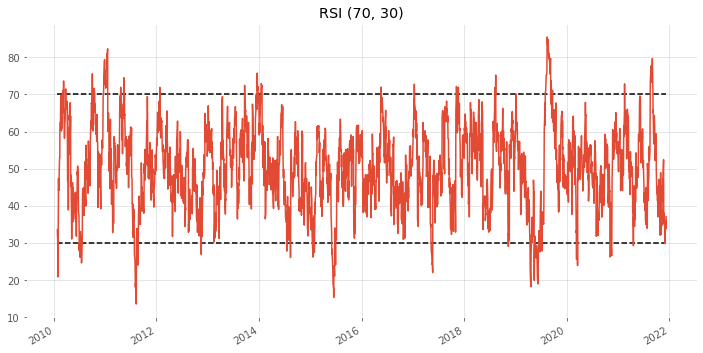

In [13]:
plt.figure(figsize = (12,6))
pair_rsi.iloc[:,0].plot()
plt.hlines(RSI_high, "2010-01-25", "2021-12-10", colors="black", linestyles="--")
plt.hlines(RSI_low, "2010-01-25", "2021-12-10", colors="black", linestyles="--")
plt.title(f"RSI {RSI_high, RSI_low}")
plt.show()

In [14]:
pair_signal = pair_rsi.apply(lambda x: np.where(x > RSI_high, -1, np.where(x < RSI_low, 2, 0))) # Both Buy and Sell signal
#pair_signal = pair_rsi.apply(lambda x: np.where(x > RSI_high, -1,0)) # Sell signal only
pair_signal.head()

,"('A', 'MTD')","('ADP', 'PAYX')","('FFIV', 'STX')","('FFIV', 'ZBRA')","('MPWR', 'TER')","('ADI', 'TXN')","('AMZN', 'CRM')","('ADBE', 'ANSS')","('AJG', 'BRO')","('AJG', 'NDAQ')",...,"('AIZ', 'CINF')","('AIZ', 'WRB')","('BK', 'PRU')","('ANTM', 'DGX')","('ANTM', 'LH')","('CL', 'KMB')","('AVB', 'EQR')","('AVB', 'ESS')","('EIX', 'PPL')","('AEE', 'LNT')"
2010-01-25,0,0,0,0,0,2,-1,0,-1,-1,...,-1,0,0,-1,-1,0,0,0,-1,2
2010-01-26,0,0,0,0,0,2,0,0,0,-1,...,0,0,0,-1,0,0,0,0,-1,2
2010-01-27,0,0,0,0,0,2,0,0,0,-1,...,0,0,0,-1,0,0,0,0,-1,2
2010-01-28,2,0,0,0,0,2,-1,0,0,-1,...,0,0,0,-1,-1,0,0,0,-1,2
2010-01-29,2,0,0,0,0,0,-1,0,0,-1,...,0,0,0,-1,-1,0,0,0,-1,2


In [15]:
pair_signal.iloc[:,0].head(10)

2010-01-25    0
2010-01-26    0
2010-01-27    0
2010-01-28    2
2010-01-29    2
2010-02-01    0
2010-02-02    0
2010-02-03    0
2010-02-04    0
2010-02-05    0
Name: ('A', 'MTD'), dtype: int32

<AxesSubplot:>

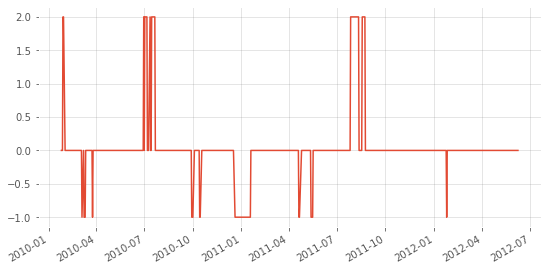

In [16]:
pair_signal.iloc[:,0].head(600).plot(figsize = (9,4.5))

<AxesSubplot:>

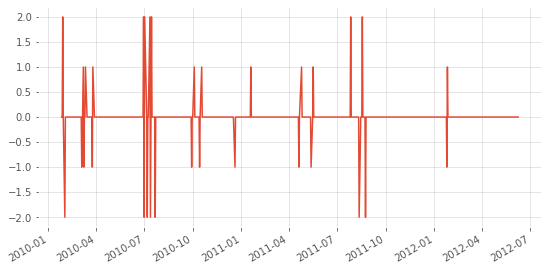

In [17]:
pair_signal.iloc[:,0].diff().head(600).plot(figsize = (9,4.5))
#1 is short the spread and start the buy signal,2 is close the signal (RSI is now too high)

In [18]:
pair_signal = pair_signal.apply(lambda x: x.diff())
pair_signal = pair_signal.apply(lambda x: np.where(x == 1, -1, np.where(x == 2, 0, np.nan))).ffill().fillna(0)
pair_signal

,"('A', 'MTD')","('ADP', 'PAYX')","('FFIV', 'STX')","('FFIV', 'ZBRA')","('MPWR', 'TER')","('ADI', 'TXN')","('AMZN', 'CRM')","('ADBE', 'ANSS')","('AJG', 'BRO')","('AJG', 'NDAQ')",...,"('AIZ', 'CINF')","('AIZ', 'WRB')","('BK', 'PRU')","('ANTM', 'DGX')","('ANTM', 'LH')","('CL', 'KMB')","('AVB', 'EQR')","('AVB', 'ESS')","('EIX', 'PPL')","('AEE', 'LNT')"
2010-01-25,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2010-01-26,0.000,0.000,0.000,0.000,0.000,0.000,-1.000,0.000,-1.000,0.000,...,-1.000,0.000,0.000,0.000,-1.000,0.000,0.000,0.000,0.000,0.000
2010-01-27,0.000,0.000,0.000,0.000,0.000,0.000,-1.000,0.000,-1.000,0.000,...,-1.000,0.000,0.000,0.000,-1.000,0.000,0.000,0.000,0.000,0.000
2010-01-28,0.000,0.000,0.000,0.000,0.000,0.000,-1.000,0.000,-1.000,0.000,...,-1.000,0.000,0.000,0.000,-1.000,0.000,0.000,0.000,0.000,0.000
2010-01-29,0.000,0.000,0.000,0.000,0.000,0.000,-1.000,0.000,-1.000,0.000,...,-1.000,0.000,0.000,0.000,-1.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-06,0.000,-1.000,-1.000,-1.000,0.000,-1.000,-1.000,-1.000,0.000,0.000,...,0.000,0.000,-1.000,-1.000,-1.000,0.000,-1.000,-1.000,-1.000,-1.000
2021-12-07,0.000,-1.000,-1.000,-1.000,0.000,-1.000,-1.000,-1.000,0.000,-1.000,...,0.000,0.000,-1.000,-1.000,-1.000,0.000,-1.000,-1.000,-1.000,-1.000
2021-12-08,0.000,-1.000,-1.000,-1.000,0.000,-1.000,-1.000,-1.000,0.000,-1.000,...,0.000,0.000,-1.000,-1.000,-1.000,0.000,-1.000,-1.000,-1.000,-1.000
2021-12-09,0.000,-1.000,-1.000,-1.000,0.000,-1.000,-1.000,-1.000,0.000,-1.000,...,0.000,0.000,-1.000,-1.000,-1.000,0.000,-1.000,-1.000,-1.000,-1.000


#### Now pair_signal contains positions

<AxesSubplot:>

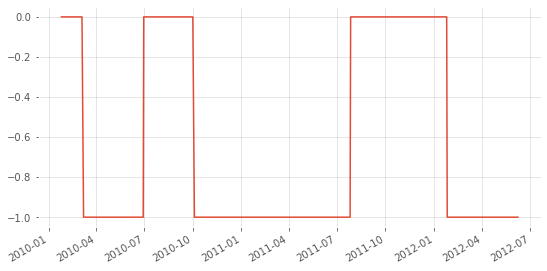

In [19]:
pair_signal.iloc[:,0].head(600).plot(figsize = (9,4.5))

In [20]:
### VVVVV Imp (to truncate returns file to be similar dates as signal)
data_return = data_return.loc[pair_signal.index,:].copy(deep=True)

In [21]:
# 'Load 'betas' from Spread notebook'
%store -r betas
betas

[0.09579564414343494,
 2.0052194159517116,
 1.3858042904295016,
 0.2118213735602401,
 3.373027729260123,
 0.818660833421816,
 14.59425176520643,
 1.6961814194711105,
 2.5340846112062767,
 0.7583986578325042,
 0.5437890959374123,
 0.5443549770594525,
 0.82130302130982,
 0.9432927690960962,
 1.2717512485505913,
 1.9573284081446332,
 0.5126555047729424,
 3.32337165641579,
 1.8422473620736217,
 0.45727987270923437,
 2.666188408510517,
 0.5780766458782425,
 2.578318627219797,
 1.4994971997117528]

In [22]:
strategy_return = pd.DataFrame(index = pair_signal.index,
                              columns = pair_signal.columns)
strategy_return2 = strategy_return.copy()

In [23]:
for i in range(0,len(pairs)):
    print(pairs[i], "done")
    strategy_return.iloc[:,i] = (pair_signal.iloc[:,i] * data_return.loc[:,pairs[i][0]] - pair_signal.iloc[:,i] * betas[i] * data_return.loc[:,pairs[i][1]]).cumsum().apply(np.exp)
    strategy_return2.iloc[:,i] = (pair_signal.iloc[:,i] * data_return.loc[:,pairs[i][0]] - pair_signal.iloc[:,i] * betas[i] * data_return.loc[:,pairs[i][1]]).apply(np.exp) - 1

('A', 'MTD') done
('ADP', 'PAYX') done
('FFIV', 'STX') done
('FFIV', 'ZBRA') done
('MPWR', 'TER') done
('ADI', 'TXN') done
('AMZN', 'CRM') done
('ADBE', 'ANSS') done
('AJG', 'BRO') done
('AJG', 'NDAQ') done
('ABT', 'LLY') done
('CRL', 'IDXX') done
('CRL', 'TECH') done
('AIZ', 'CB') done
('AIZ', 'CINF') done
('AIZ', 'WRB') done
('BK', 'PRU') done
('ANTM', 'DGX') done
('ANTM', 'LH') done
('CL', 'KMB') done
('AVB', 'EQR') done
('AVB', 'ESS') done
('EIX', 'PPL') done
('AEE', 'LNT') done


In [24]:
strategy_return

,"('A', 'MTD')","('ADP', 'PAYX')","('FFIV', 'STX')","('FFIV', 'ZBRA')","('MPWR', 'TER')","('ADI', 'TXN')","('AMZN', 'CRM')","('ADBE', 'ANSS')","('AJG', 'BRO')","('AJG', 'NDAQ')",...,"('AIZ', 'CINF')","('AIZ', 'WRB')","('BK', 'PRU')","('ANTM', 'DGX')","('ANTM', 'LH')","('CL', 'KMB')","('AVB', 'EQR')","('AVB', 'ESS')","('EIX', 'PPL')","('AEE', 'LNT')"
2010-01-25,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
2010-01-26,1.000,1.000,1.000,1.000,1.000,1.000,1.344,1.000,0.997,1.000,...,1.008,1.000,1.000,1.000,1.030,1.000,1.000,1.000,1.000,1.000
2010-01-27,1.000,1.000,1.000,1.000,1.000,1.000,1.305,1.000,1.004,1.000,...,1.008,1.000,1.000,1.000,0.993,1.000,1.000,1.000,1.000,1.000
2010-01-28,1.000,1.000,1.000,1.000,1.000,1.000,0.961,1.000,0.972,1.000,...,1.005,1.000,1.000,1.000,0.967,1.000,1.000,1.000,1.000,1.000
2010-01-29,1.000,1.000,1.000,1.000,1.000,1.000,0.840,1.000,0.971,1.000,...,1.018,1.000,1.000,1.000,0.979,1.000,1.000,1.000,1.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-06,0.821,2.617,1.550,0.304,17.144,1.018,959634087.279,1.804,9.388,1.248,...,1.938,2.182,0.799,1.897,2.243,1.051,1.660,0.858,1.921,2.129
2021-12-07,0.821,2.635,1.599,0.297,17.144,1.005,1475072894.428,1.795,9.388,1.267,...,1.938,2.182,0.795,1.962,2.299,1.051,1.657,0.860,1.964,2.123
2021-12-08,0.821,2.641,1.559,0.300,17.144,0.997,1421236197.209,1.794,9.388,1.279,...,1.938,2.182,0.792,1.940,2.283,1.051,1.702,0.851,1.950,2.116
2021-12-09,0.821,2.616,1.520,0.303,17.144,0.998,1288406739.553,1.772,9.388,1.276,...,1.938,2.182,0.785,1.828,2.059,1.051,1.673,0.855,1.933,2.108


In [25]:
no_years = (strategy_return.index[-1].to_pydatetime() - strategy_return.index[1].to_pydatetime()).days/365

In [26]:
print("CAGR in %")
print(round((strategy_return.iloc[-1,:]**(1/no_years) - 1)*100,2))

CAGR in %
('A', 'MTD')        -1.650
('ADP', 'PAYX')      8.560
('FFIV', 'STX')      3.610
('FFIV', 'ZBRA')    -9.610
('MPWR', 'TER')     27.020
('ADI', 'TXN')       0.090
('AMZN', 'CRM')    489.830
('ADBE', 'ANSS')     4.790
('AJG', 'BRO')      20.740
('AJG', 'NDAQ')      2.030
('ABT', 'LLY')      -1.820
('CRL', 'IDXX')     -1.120
('CRL', 'TECH')      0.260
('AIZ', 'CB')       -1.690
('AIZ', 'CINF')      5.730
('AIZ', 'WRB')       6.790
('BK', 'PRU')       -1.950
('ANTM', 'DGX')      5.410
('ANTM', 'LH')       6.400
('CL', 'KMB')        0.420
('AVB', 'EQR')       4.400
('AVB', 'ESS')      -1.370
('EIX', 'PPL')       5.740
('AEE', 'LNT')       6.600
Name: 2021-12-10 00:00:00, dtype: float64


In [27]:
print("Sharpe Ratio")
print(round(np.sqrt(253)*strategy_return2.mean()/strategy_return2.std(),3))

Sharpe Ratio
('A', 'MTD')       -0.010
('ADP', 'PAYX')     0.568
('FFIV', 'STX')     0.289
('FFIV', 'ZBRA')   -0.346
('MPWR', 'TER')     0.687
('ADI', 'TXN')      0.055
('AMZN', 'CRM')     1.982
('ADBE', 'ANSS')    0.323
('AJG', 'BRO')      0.822
('AJG', 'NDAQ')     0.245
('ABT', 'LLY')     -0.099
('CRL', 'IDXX')     0.013
('CRL', 'TECH')     0.097
('AIZ', 'CB')      -0.069
('AIZ', 'CINF')     0.425
('AIZ', 'WRB')      0.418
('BK', 'PRU')      -0.103
('ANTM', 'DGX')     0.336
('ANTM', 'LH')      0.364
('CL', 'KMB')       0.092
('AVB', 'EQR')      0.301
('AVB', 'ESS')     -0.101
('EIX', 'PPL')      0.336
('AEE', 'LNT')      0.546
dtype: float64


Text(0.5, 1.0, 'Daily Return characteristics of Pairs')

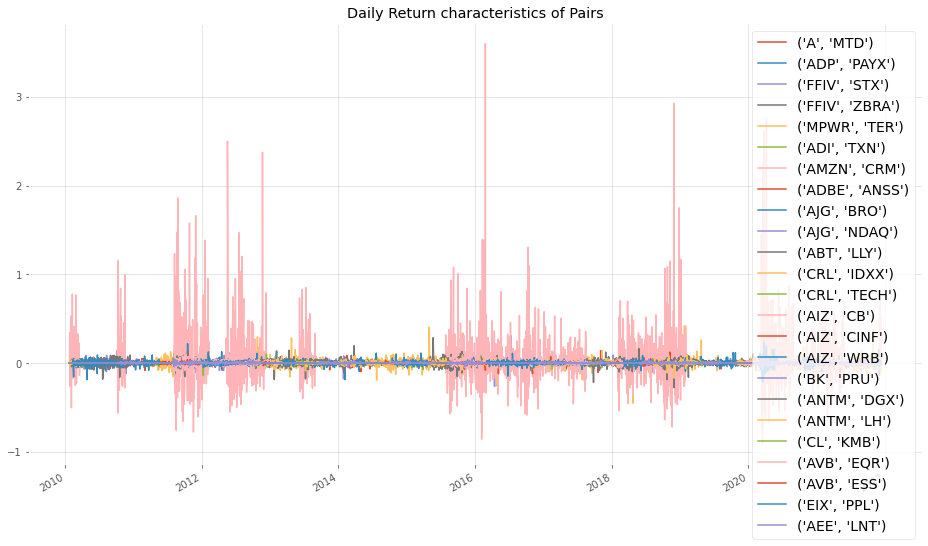

In [28]:
strategy_return2.plot(figsize = (16,9))
plt.title("Daily Return characteristics of Pairs")

Text(0.5, 1.0, 'Stategy Cumulative Return')

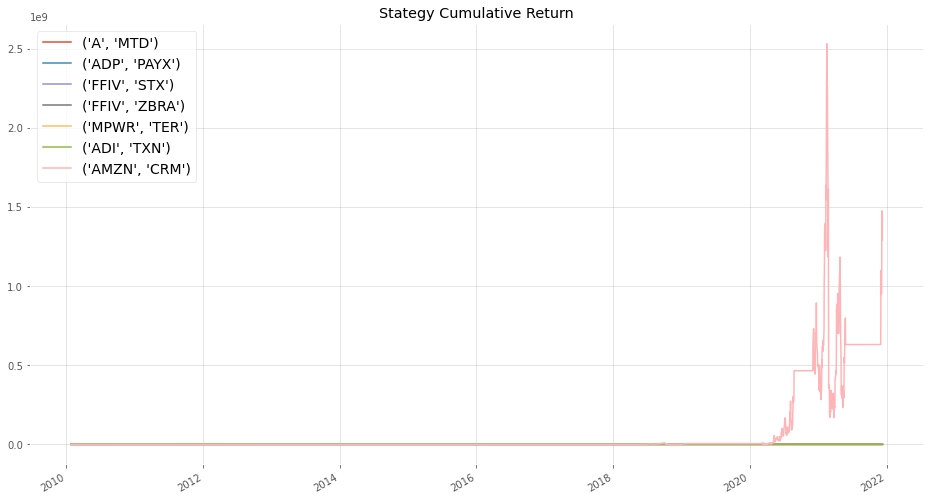

In [29]:
strategy_return.iloc[:,:7].plot(figsize = (16,9))
plt.title("Stategy Cumulative Return")

Text(0.5, 1.0, 'Stategy Cumulative Return')

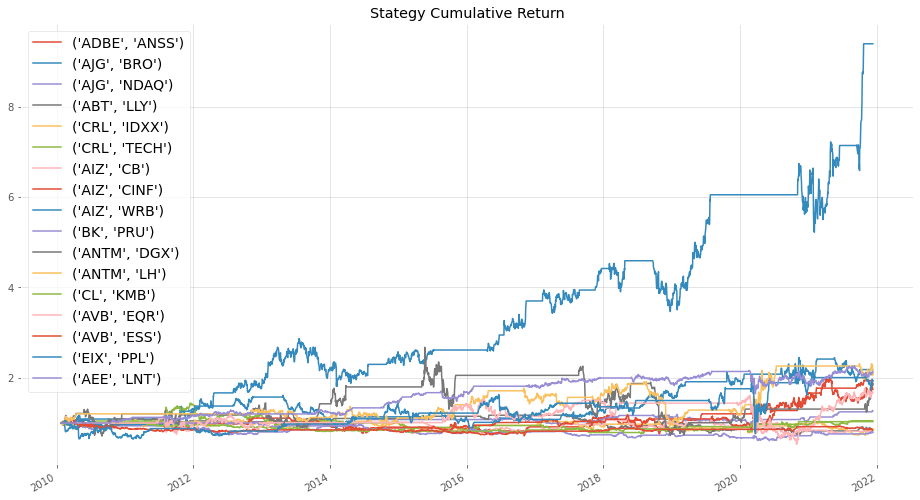

In [30]:
strategy_return.iloc[:,7:].plot(figsize = (16,9))
plt.title("Stategy Cumulative Return")

Text(0.5, 1.0, 'Stategy Cumulative Return')

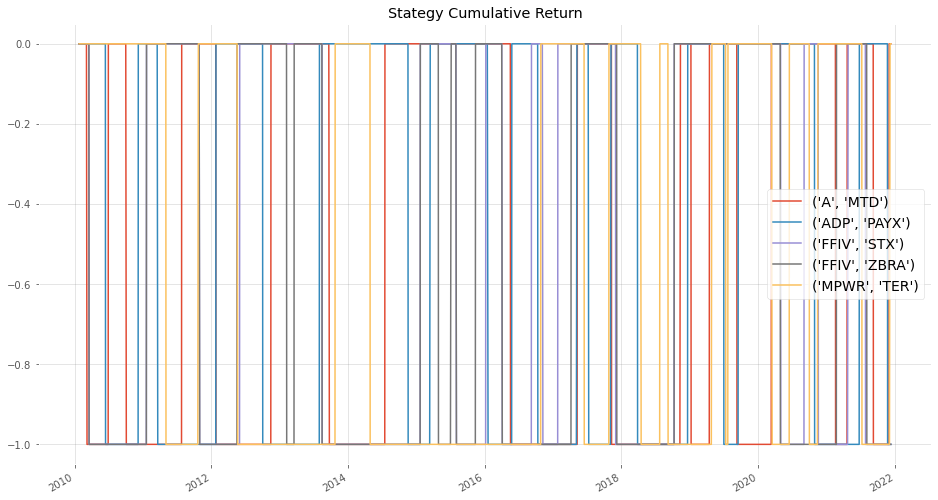

In [31]:
pair_signal.iloc[:,:5].plot(figsize = (16,9))
plt.title("Stategy Cumulative Return")

<AxesSubplot:>

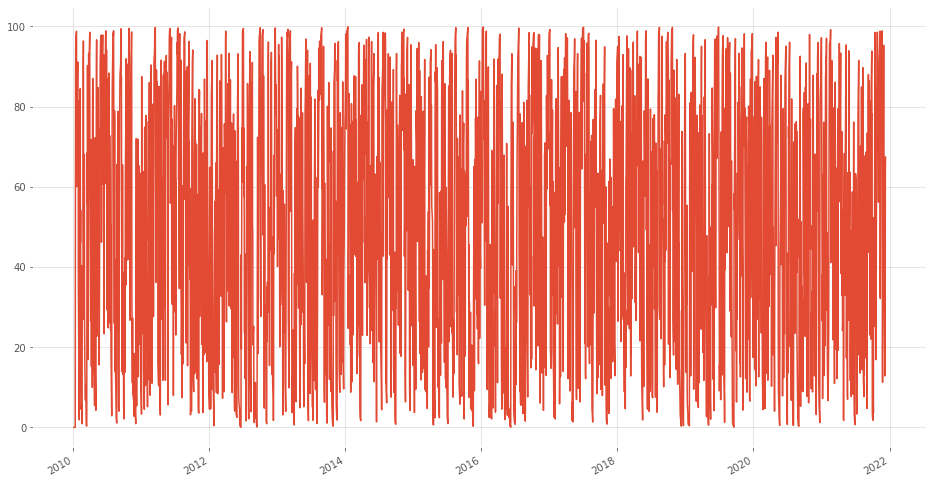

In [32]:
RSI(pair_spread.iloc[:,1],1).plot(figsize=(16,9))